In [65]:
import sys
import pandas as pd
from shutil import copyfile
import cv2
import numpy as np
from matplotlib import pyplot
%matplotlib inline
import sys

In [66]:
sys.path.append('..')

In [67]:
import tmp

### Create translation maxtrix (to shift the image right by 6 pixels)

In [71]:
tx_matrix = np.float32(np.array([1, 0, 6, 0, 1, 0]).reshape(2, 3))

### Translation of pixels from out of the image into image causes black pixels. Hence compute the inverse of the black filters by tranlating a white image and inverting it.

In [61]:
white_mask = cv2.warpAffine(np.ones_like(img) * 255, tx_matrix, dsize=(img.shape[1], img.shape[0]))
white_mask = 255 - white_mask

def translate_image(src_path):
    img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.warpAffine(img, tx_matrix, dsize=(img.shape[1], img.shape[0]))
    cv2.imwrite(src_path, img)


In [72]:
list_font_png = tmp.recursive_find_files('../fonts', '.*png')

In [69]:
len(list_font_png)

36

In [73]:
for path in list_font_png:
    translate_image(path)

In [60]:
help(cv2.warpAffine)

Help on built-in function warpAffine:

warpAffine(...)
    warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies an affine transformation to an image.
    .   
    .   The function warpAffine transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})\f]
    .   
    .   when the flag WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted
    .   with cv::invertAffineTransform and then put in the formula above instead of M. The function cannot
    .   operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$2\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags combination of interpolation methods

In [15]:
im0 = cv2.imread('/home/gopik/github/cnn/fonts/arial_35/0/0.png', cv2.IMREAD_GRAYSCALE)

In [16]:
im0[:10, :10]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 250, 158,  70,  21,   5],
       [255, 255, 255, 255, 223,  46,   0,   0,   0,   0],
       [255, 255, 255, 234,  30,   0,   0,   0,   0,   0]], dtype=uint8)

In [36]:
np.sum(im0[:10, :10], axis=0)

array([2550, 2550, 2550, 2529, 2293, 2081, 1943, 1855, 1806, 1790], dtype=uint64)

In [54]:
y = np.sum(imp, axis=0)

In [48]:
yp = np.hstack([np.array([255]*18), y])

In [55]:
x = np.linspace(0, len(y), len(y))

In [29]:
len(y)

40

In [34]:
len(x)

40

In [43]:
y

array([10200,  9154,  6527,  5476,  5467,  7673,  8279,  8519,  8632,
        8666,  8647,  8537,  8334,  7890,  5990,  5304,  6216,  8335,
       10200, 10200, 10200, 10200, 10200, 10200, 10200, 10200, 10200,
       10200, 10200, 10200], dtype=uint64)

In [44]:
np.argmax(y[5:15])

4

In [46]:
y[9]

8666

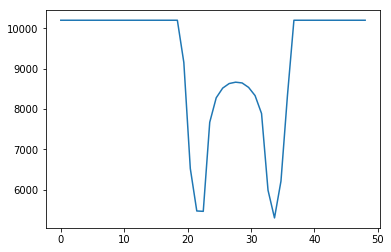

In [56]:
pyplot.plot(x, y)

In [51]:
np.array([255]*18)

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255])

In [52]:
len(yp)

48

In [44]:
lot1_files = tmp.recursive_find_files('../data/lot1', '.*recog.*jpg')

In [59]:
path = pd.Series(lot1_files)

In [57]:
basename = s.apply(lambda p: os.path.basename(p))

In [60]:
cat = basename.str.split('_').str[1]

In [63]:
df = pd.DataFrame({'path': path, 'basename': basename, 'cat':cat})

In [72]:
def copy_file(base, cat, src):
    target_dir = os.path.join(base, cat)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    dst = os.path.join(target_dir, os.path.basename(src))
    copyfile(dst=dst, src=src)
    
df = df.apply(lambda row: copy_file('/home/gopik/github/cnn/data/lot1/train', row['cat'], row['path']), axis=1)
        

In [155]:
import Augmentor
p = Augmentor.Pipeline('/home/gopik/github/cnn/fonts/arial_35/')
p.rotate(probability=0.6, max_left_rotation=4, max_right_rotation=4)
p.skew_tilt(probability=0.6)
p.skew_corner(probability=0.6)
#p.random_distortion(probability=0.8, grid_height=16, grid_width=16, magnitude=0.5)
#p.shear(0.5, 4, 4)
#p.zoom(probability=0.8, min_factor=1.0, max_factor=1.2)

Initialised with 36 image(s) found.
Output directory set to /home/gopik/github/cnn/fonts/arial_35/output.

In [157]:
import cv2

In [158]:
import image_transform

In [159]:
img = cv2.imread('/home/gopik/github/cnn/fonts/arial_35/0/0.png', cv2.IMREAD_GRAYSCALE)

In [161]:
from matplotlib import pyplot

In [162]:
%matplotlib inline

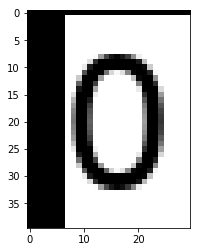

In [170]:
pyplot.imshow(img_tx, cmap='gray')

In [ ]:
tx_matrix = np.array([1, 0, 6, 0, 1, 1]).reshape(2, 3)

In [169]:
img_tx = cv2.warpAffine(img, np.float32(tx_matrix), dsize=(img.shape[1], img.shape[0]))

In [166]:
import numpy as np

In [156]:
p.sample(20)





Executing Pipeline:   0%|          | 0/20 [00:00<?, ? Samples/s]



Processing 0.png:   0%|          | 0/20 [00:00<?, ? Samples/s]  



Processing 1.png:   5%|▌         | 1/20 [00:00<00:00, 34.64 Samples/s]



Processing 2.png:  10%|█         | 2/20 [00:00<00:00, 54.15 Samples/s]



Processing 3.png:  15%|█▌        | 3/20 [00:00<00:00, 66.87 Samples/s]



Processing 4.png:  20%|██        | 4/20 [00:00<00:00, 77.42 Samples/s]



Processing 5.png:  25%|██▌       | 5/20 [00:00<00:00, 84.72 Samples/s]



Processing 6.png:  30%|███       | 6/20 [00:00<00:00, 94.58 Samples/s]



Processing 7.png:  35%|███▌      | 7/20 [00:00<00:00, 103.65 Samples/s]



Processing 8.png:  40%|████      | 8/20 [00:00<00:00, 106.49 Samples/s]



Processing 9.png:  45%|████▌     | 9/20 [00:00<00:00, 108.39 Samples/s]



Processing A.png:  50%|█████     | 10/20 [00:00<00:00, 114.61 Samples/s]



Processing B.png:  55%|█████▌    | 11/20 [00:00<00:00, 110.53 Samples/s]



Processing B.png:  60%|██████    | 12/2

In [147]:
p.sample(1000)





Executing Pipeline:   0%|          | 0/1000 [00:00<?, ? Samples/s]



Processing 0.png:   0%|          | 0/1000 [00:00<?, ? Samples/s]  



Processing 1.png:   0%|          | 1/1000 [00:00<00:41, 24.20 Samples/s]



Processing 2.png:   0%|          | 2/1000 [00:00<00:27, 36.72 Samples/s]



Processing 3.png:   0%|          | 3/1000 [00:00<00:23, 42.47 Samples/s]



Processing 4.png:   0%|          | 4/1000 [00:00<00:21, 47.39 Samples/s]



Processing 5.png:   0%|          | 5/1000 [00:00<00:18, 53.65 Samples/s]



Processing 6.png:   1%|          | 6/1000 [00:00<00:16, 59.96 Samples/s]



Processing 6.png:   1%|          | 7/1000 [00:00<00:14, 67.56 Samples/s]



Processing 7.png:   1%|          | 7/1000 [00:00<00:14, 67.56 Samples/s]



Processing 8.png:   1%|          | 8/1000 [00:00<00:14, 67.56 Samples/s]



Processing 9.png:   1%|          | 9/1000 [00:00<00:14, 67.56 Samples/s]



Processing A.png:   1%|          | 10/1000 [00:00<00:14, 67.56 Samples/s]



Processing B.png:  

Processing O.png:  17%|█▋        | 168/1000 [00:01<00:07, 105.08 Samples/s]



Processing P.png:  17%|█▋        | 169/1000 [00:01<00:07, 105.08 Samples/s]



Processing P.png:  17%|█▋        | 170/1000 [00:01<00:06, 119.25 Samples/s]



Processing Q.png:  17%|█▋        | 170/1000 [00:01<00:06, 119.25 Samples/s]



Processing R.png:  17%|█▋        | 171/1000 [00:01<00:06, 119.25 Samples/s]



Processing S.png:  17%|█▋        | 172/1000 [00:01<00:06, 119.25 Samples/s]



Processing T.png:  17%|█▋        | 173/1000 [00:01<00:06, 119.25 Samples/s]



Processing U.png:  17%|█▋        | 174/1000 [00:01<00:06, 119.25 Samples/s]



Processing V.png:  18%|█▊        | 175/1000 [00:01<00:06, 119.25 Samples/s]



Processing W.png:  18%|█▊        | 176/1000 [00:01<00:06, 119.25 Samples/s]



Processing X.png:  18%|█▊        | 177/1000 [00:01<00:06, 119.25 Samples/s]



Processing Y.png:  18%|█▊        | 178/1000 [00:01<00:06, 119.25 Samples/s]



Processing Z.png:  18%|█▊        | 179/1000 [00:01<0

Processing C.png:  34%|███▎      | 336/1000 [00:02<00:05, 124.47 Samples/s]



Processing D.png:  34%|███▎      | 337/1000 [00:02<00:05, 124.47 Samples/s]



Processing E.png:  34%|███▍      | 338/1000 [00:02<00:05, 124.47 Samples/s]



Processing F.png:  34%|███▍      | 339/1000 [00:02<00:05, 124.47 Samples/s]



Processing G.png:  34%|███▍      | 340/1000 [00:02<00:05, 124.47 Samples/s]



Processing H.png:  34%|███▍      | 341/1000 [00:02<00:05, 124.47 Samples/s]



Processing I.png:  34%|███▍      | 342/1000 [00:02<00:05, 124.47 Samples/s]



Processing J.png:  34%|███▍      | 343/1000 [00:02<00:05, 124.47 Samples/s]



Processing K.png:  34%|███▍      | 344/1000 [00:02<00:05, 124.47 Samples/s]



Processing L.png:  34%|███▍      | 345/1000 [00:02<00:05, 124.47 Samples/s]



Processing M.png:  35%|███▍      | 346/1000 [00:02<00:05, 124.47 Samples/s]



Processing N.png:  35%|███▍      | 347/1000 [00:02<00:05, 124.47 Samples/s]



Processing O.png:  35%|███▍      | 348/1000 [00:02<0

Processing 2.png:  51%|█████     | 506/1000 [00:04<00:03, 129.36 Samples/s]



Processing 3.png:  51%|█████     | 507/1000 [00:04<00:03, 129.36 Samples/s]



Processing 4.png:  51%|█████     | 508/1000 [00:04<00:03, 129.36 Samples/s]



Processing 5.png:  51%|█████     | 509/1000 [00:04<00:03, 129.36 Samples/s]



Processing 6.png:  51%|█████     | 510/1000 [00:04<00:03, 129.36 Samples/s]



Processing 7.png:  51%|█████     | 511/1000 [00:04<00:03, 129.36 Samples/s]



Processing 8.png:  51%|█████     | 512/1000 [00:04<00:03, 129.36 Samples/s]



Processing 9.png:  51%|█████▏    | 513/1000 [00:04<00:03, 129.36 Samples/s]



Processing A.png:  51%|█████▏    | 514/1000 [00:04<00:03, 129.36 Samples/s]



Processing A.png:  52%|█████▏    | 515/1000 [00:04<00:03, 127.79 Samples/s]



Processing B.png:  52%|█████▏    | 515/1000 [00:04<00:03, 127.79 Samples/s]



Processing C.png:  52%|█████▏    | 516/1000 [00:04<00:03, 127.79 Samples/s]



Processing D.png:  52%|█████▏    | 517/1000 [00:04<0

Processing Q.png:  67%|██████▋   | 674/1000 [00:05<00:02, 113.40 Samples/s]



Processing R.png:  68%|██████▊   | 675/1000 [00:05<00:02, 113.40 Samples/s]



Processing S.png:  68%|██████▊   | 676/1000 [00:05<00:02, 113.40 Samples/s]



Processing S.png:  68%|██████▊   | 677/1000 [00:05<00:02, 116.94 Samples/s]



Processing T.png:  68%|██████▊   | 677/1000 [00:05<00:02, 116.94 Samples/s]



Processing U.png:  68%|██████▊   | 678/1000 [00:05<00:02, 116.94 Samples/s]



Processing V.png:  68%|██████▊   | 679/1000 [00:05<00:02, 116.94 Samples/s]



Processing W.png:  68%|██████▊   | 680/1000 [00:05<00:02, 116.94 Samples/s]



Processing X.png:  68%|██████▊   | 681/1000 [00:05<00:02, 116.94 Samples/s]



Processing Y.png:  68%|██████▊   | 682/1000 [00:05<00:02, 116.94 Samples/s]



Processing Z.png:  68%|██████▊   | 683/1000 [00:05<00:02, 116.94 Samples/s]



Processing 0.png:  68%|██████▊   | 684/1000 [00:05<00:02, 116.94 Samples/s]



Processing 1.png:  68%|██████▊   | 685/1000 [00:05<0

Processing D.png:  84%|████████▍ | 841/1000 [00:06<00:01, 119.82 Samples/s]



Processing E.png:  84%|████████▍ | 842/1000 [00:07<00:01, 119.82 Samples/s]



Processing F.png:  84%|████████▍ | 843/1000 [00:07<00:01, 119.82 Samples/s]



Processing G.png:  84%|████████▍ | 844/1000 [00:07<00:01, 119.82 Samples/s]



Processing H.png:  84%|████████▍ | 845/1000 [00:07<00:01, 119.82 Samples/s]



Processing H.png:  85%|████████▍ | 846/1000 [00:07<00:01, 108.72 Samples/s]



Processing I.png:  85%|████████▍ | 846/1000 [00:07<00:01, 108.72 Samples/s]



Processing J.png:  85%|████████▍ | 847/1000 [00:07<00:01, 108.72 Samples/s]



Processing K.png:  85%|████████▍ | 848/1000 [00:07<00:01, 108.72 Samples/s]



Processing L.png:  85%|████████▍ | 849/1000 [00:07<00:01, 108.72 Samples/s]



Processing M.png:  85%|████████▌ | 850/1000 [00:07<00:01, 108.72 Samples/s]



Processing N.png:  85%|████████▌ | 851/1000 [00:07<00:01, 108.72 Samples/s]



Processing O.png:  85%|████████▌ | 852/1000 [00:07<0

In [129]:
import string

In [130]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [132]:
import shutil

In [135]:
for c in string.ascii_uppercase + string.digits:
    target_dir = os.path.join('/home/gopik/github/cnn/fonts/arial_35/', c)
    if not os.path.exists(target_dir):
        os.mkdir(target_dir)
    if not os.path.exists(target_dir + "/" + c + ".png"):
        shutil.move('/home/gopik/github/cnn/fonts/arial_35/' + c + '.png', target_dir)
        

In [128]:
p.class_labels

[(0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35'),
 (0, 'arial_35')]

In [127]:
p.sample(200)





Executing Pipeline:   0%|          | 0/200 [00:00<?, ? Samples/s]



Processing W.png:   0%|          | 0/200 [00:00<?, ? Samples/s]  



Processing E.png:   0%|          | 1/200 [00:00<00:05, 38.06 Samples/s]



Processing O.png:   1%|          | 2/200 [00:00<00:03, 52.81 Samples/s]



Processing Y.png:   2%|▏         | 3/200 [00:00<00:02, 66.14 Samples/s]



Processing M.png:   2%|▏         | 4/200 [00:00<00:02, 76.53 Samples/s]



Processing 2.png:   2%|▎         | 5/200 [00:00<00:02, 87.62 Samples/s]



Processing 3.png:   3%|▎         | 6/200 [00:00<00:02, 95.65 Samples/s]



Processing N.png:   4%|▎         | 7/200 [00:00<00:01, 103.81 Samples/s]



Processing V.png:   4%|▍         | 8/200 [00:00<00:01, 110.97 Samples/s]



Processing 9.png:   4%|▍         | 9/200 [00:00<00:01, 118.48 Samples/s]



Processing G.png:   5%|▌         | 10/200 [00:00<00:01, 124.68 Samples/s]



Processing 0.png:   6%|▌         | 11/200 [00:00<00:01, 129.61 Samples/s]



Processing X.png:   6%|▌  

Processing C.png:  84%|████████▍ | 169/200 [00:01<00:00, 121.12 Samples/s]



Processing J.png:  85%|████████▌ | 170/200 [00:01<00:00, 121.12 Samples/s]



Processing P.png:  86%|████████▌ | 171/200 [00:01<00:00, 121.12 Samples/s]



Processing 8.png:  86%|████████▌ | 172/200 [00:01<00:00, 121.12 Samples/s]



Processing 1.png:  86%|████████▋ | 173/200 [00:01<00:00, 121.12 Samples/s]



Processing T.png:  87%|████████▋ | 174/200 [00:01<00:00, 121.12 Samples/s]



Processing A.png:  88%|████████▊ | 175/200 [00:01<00:00, 121.12 Samples/s]



Processing A.png:  88%|████████▊ | 176/200 [00:01<00:00, 114.12 Samples/s]



Processing 5.png:  88%|████████▊ | 176/200 [00:01<00:00, 114.12 Samples/s]



Processing R.png:  88%|████████▊ | 177/200 [00:01<00:00, 114.12 Samples/s]



Processing 4.png:  89%|████████▉ | 178/200 [00:01<00:00, 114.12 Samples/s]



Processing B.png:  90%|████████▉ | 179/200 [00:01<00:00, 114.12 Samples/s]



Processing W.png:  90%|█████████ | 180/200 [00:01<00:00, 114.12 

In [103]:
p.add_further_directory('/home/gopik/github/cnn/fonts/arial_35/')

Initialised with 36 image(s) found.
Output directory set to /home/gopik/github/cnn/fonts/arial_35/output.

In [106]:
p.sample(1)


Executing Pipeline:   0%|          | 0/1 [00:00<?, ? Samples/s]

ValueError: non-integer arg 1 for randrange()